# Data Engineering Assignment 1 :

## Food webs Graph Theory case study:
<a id='menu'></a>

### Table of content:
1) [Basic Tutorial from the case study](#BasicTut)

2) [Degree of Network Using Networkx](#Degree)

3) [Bowtie Structure](#Bowtie)

4) [Distance with Breadth First Search](#Dist)

5) [Calculating S, L, L/S, B%, I%, T%, TB%, IB%, II %, TI, and P/R](#main) 

6) [For loop to calculate the above for all datasets](#mainm)

7) [Visualisation to understand and compare parameters](#viz)

8) [Exercise 1 Note: ML pipeline](#ex1)

9) [Excersice 2 Note: SQL Interaction with python](#ex2)




### Basic Tutorial: <a id='BasicTut'></a>

In [274]:
# Building an example metrics to use 
adjacency_matrix = [[0,1,0,1],[1,0,1,1],[0,1,0,0],[1,1,0,0]]

# Building an example directed metrics to use 
adjacency_matrix_directed = [[0,1,0,1],[0,0,1,0],[0,0,0,1],[0,0,0,0]]

In [275]:
# Number of links 
len(adjacency_matrix)

4

In [276]:
# Counting number of species
num_species = len(adjacency_matrix_directed)
# Count number of links or predations which is the non zero elements
num_predations = 0
for i in range(num_species):
    for j in range(num_species):
        if adjacency_matrix_directed[i][j] != 0:
            num_predations += 1

In [277]:
num_predations

4

In [278]:
# To check different species categories ( Basel,top,Intermediate)
num_species = len(adjacency_matrix_directed)
row_count = [0,0,0,0]
column_count = [0,0,0,0]
for i in range(num_species):
    for j in range(num_species):
        row_count[i]= row_count[i] +adjacency_matrix_directed[i][j]
        column_count[j] = column_count[j] + adjacency_matrix_directed[i][j]
print("The count of 1s on each column is =" + str(column_count))
print("The count of 1s on each row is =" + str(row_count))

The count of 1s on each column is =[0, 1, 1, 2]
The count of 1s on each row is =[2, 1, 1, 0]


In [279]:
# Declaring empty variables for basel, Intermediate, Top
number_T = 0
number_B = 0
number_I = 0

# Counting number of Basel, Top, Intermediate 
for n in range(num_species):
    if row_count[n] == 0:
        number_T +=1
        continue
    if column_count[n] ==0:
        number_B +=1
        continue
    else :
        number_I += 1

# Print all the results
print("number of species "+ str(num_species))
print("number of predators "+ str(num_predations))
print("number of Basal, Top, Intermediate: ",number_B,number_T,number_I)
print("Connectance",float(num_predations)/float(num_species**2))

number of species 4
number of predators 4
number of Basal, Top, Intermediate:  1 1 2
Connectance 0.25


# The Degree

In [280]:
#for the undirected network
degree_node_2 = 0
for j in adjacency_matrix[1]:
    degree_node_2 += j
print("Degree of node 2 :", degree_node_2)

#for the directed case we already calculated the sum over 
#the rows and columns for the adjacency_matrix_directed

out_degree_node_3 = row_count[2]
in_degree_node_4 = column_count[3]

print("Out Degree of node 3 :", out_degree_node_3)
print("in Degree of node 4 :", in_degree_node_4)


Degree of node 2 : 3
Out Degree of node 3 : 1
in Degree of node 4 : 2


# Degree of Nodes using Networkx: <a id='Degree'></a>

In [281]:
#Importing the libraries
import networkx as nx

In [282]:
#Generating an empty graph
G = nx.Graph()

In [283]:
# Defining the nodes 
for a in range(1,4):
    G.add_node(a)
# linking the nodes

G.add_edge(1,2)
G.add_edge(1,4)
G.add_edge(2,3)
G.add_edge(2,4)

In [284]:
print("Degree for 2 is :",G.degree(2))

Degree for 2 is : 3


# Degree of Sequence:

In [285]:
degree_sequence =[]
for row in range(len(adjacency_matrix)):
    degree =0
    for j in adjacency_matrix[row]:
        degree=degree+j
    degree_sequence.append(degree)
print("Degree of sequence is :",degree_sequence)

Degree of sequence is : [2, 3, 1, 2]


# Plotting the degree sequence 

In [286]:
# Importing the library
import matplotlib.pyplot as plt

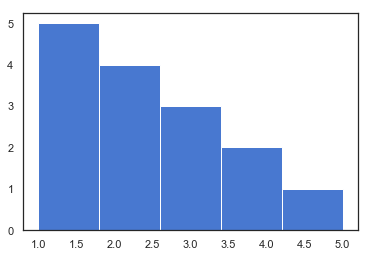

In [287]:
# Creating a histogram using hist method
plt.hist([1,1,1,1,1,2,2,2,2,3,3,3,4,4,5],bins=5)
plt.show()

# Clustering Coeff:

In [288]:
# Row 1 is for node 0
row =1 
node_index_count = 0
node_index_list =[]
for a_ij in adjacency_matrix[row]:
    if a_ij ==1:
        node_index_list.append(node_index_count)
    node_index_count +=1
    
print("\r")
print(node_index_list)


[0, 2, 3]


## Checking for possible neighbouring couplings link exsistance:

In [289]:
neighb_conn =0
for n1 in node_index_list:
    for n2 in node_index_list:
        if adjacency_matrix[n1][n2]==1:
            neighb_conn += 1
            
# Since we counted them twice
neighb_conn = neighb_conn/2.0

print("Neighbour Couplings:",neighb_conn)

#Clustering coefficient for node "2" is given by expression
clustering_coeff = neighb_conn/(degree_node_2*(degree_node_2-1)/2.0)
print("Clustering Coff for Node 2 is :",clustering_coeff)

Neighbour Couplings: 1.0
Clustering Coff for Node 2 is : 0.3333333333333333


# Bowtie Structure for food web network: <a id='Bowtie'></a>
[Jump to Table of content](#menu)

In [290]:

#loading the network
file_name="C:/Users/shrey/PYTHON LEARNING/FoodWebs/data/Ythan_Estuary.txt"

DG = nx.DiGraph()
# Opening the file
in_file=open(file_name,'r')

# Adding edges to the graph
while True:
    next_line=in_file.readline()
    #print(next_line)
    if not next_line:
        break
    next_line_fields=next_line[:-1].split(' ')
    node_a=next_line_fields[1] #there is a space in the beginning 
                               #of each edge
    node_b=next_line_fields[2]
    DG.add_edge(node_a, node_b)

#deleting the environment
DG.remove_node('0')

#getting the biggest strongly connected component
scc=[(len(c),c) for c in sorted(nx.strongly_connected_components(DG), key=len, reverse=True)][0][1]



#preparing the IN and OUT component
IN_component=[]
for n in scc:
    for s in DG.predecessors(n):
        if s in scc: continue
        if not s in IN_component:
            IN_component.append(s)
            
OUT_component=[]
for n in scc:
    for s in DG.successors(n):
        if s in scc: continue
        if not s in OUT_component:
            OUT_component.append(s)


In [291]:

#generating the subgraph
bowtie= list(scc) + IN_component + OUT_component
DG_bowtie = DG.subgraph(bowtie)



In [292]:
#defining the proper layout
pos={}
in_y=100.
pos['89']=(150.,in_y)

in_step=700.
for in_n in IN_component:
    pos[in_n]=(100.,in_y)
    in_y=in_y+in_step

out_y=100.
out_step=500.   
for out_n in OUT_component:
    pos[out_n]=(200,out_y)
    out_y=out_y+out_step

pos['90']=(150.,out_y)


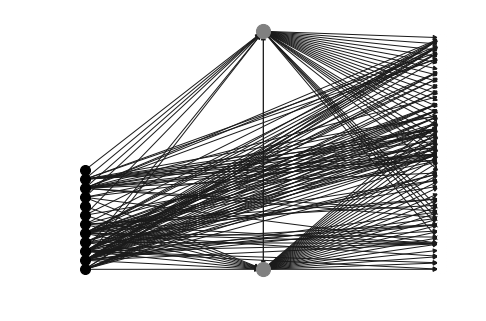

In [293]:

#plot the bowtie structure
nx.draw(DG_bowtie, pos, node_size=50)
nx.draw_networkx_nodes(DG_bowtie, pos, IN_component,node_size=100, node_color='Black')
nx.draw_networkx_nodes(DG_bowtie, pos, OUT_component,node_size=100, node_color='White')
nx.draw_networkx_nodes(DG_bowtie, pos, scc,node_size=200, node_color='Grey')

#save graph to local destination
plt.savefig('C:/Users/shrey/PYTHON LEARNING/FoodWebs/data/bowtiee.png',dpi=600)

# Distance with Breadth First Search:
## Creating unidirection graph: 
<a id='Dist'></a>

C:\Users\shrey\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


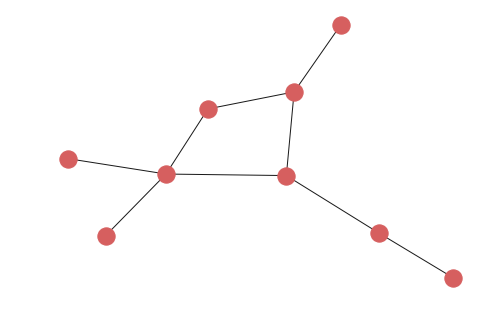

In [294]:
# Creating a graph
G = nx.Graph()
# Adding edges to the graph
G.add_edges_from([('A','B'),('A','C'),('C','D'),('C','E'),('D','F'),('D','H'),('D','G'),('E','H'),('E','I')])
# Printing the neighbours of the node 'A'
list(G.neighbors('A'))

# Drawing the network
nx.draw(G)

In [295]:
root_node ='A'
queue = []
queue.append('A')
G.node['A']["distance"]=0
while len(queue):
    working_node =queue.pop(0)
    for n in G.neighbors(working_node):
        if len(G.node[n])==0:
            G.node[n]["distance"] = G.node[working_node]["distance"]+1
            queue.append(n)
for n in G.nodes():
    print(n,G.node[n]["distance"])

A 0
B 1
C 1
D 2
E 2
F 3
H 3
G 3
I 3


# Applying the learning to provided datasets:

# *Calculating S, L, L/S, B%, I%, T%, TB%, IB%, II %, TI, and P/R:*
### 1) Using L.Rock Data 

<a id='main'></a>
[Jump to Table of content](#menu)

In [296]:
# File directory for the dataset
file_name="C:/Users/shrey/PYTHON LEARNING/FoodWebs/data/Little_Rock_Lake.txt"

#creating empty Graph
DG = nx.DiGraph()

# Opening File
in_file=open(file_name,'r')

while True:
    # Running loop through each line for loop
    next_line=in_file.readline()
    if not next_line:
        break
    next_line_fields=next_line[:-1].split(' ')
    node_a=next_line_fields[1] #there is a space in the beginning 
                               #of each edge
    node_b=next_line_fields[2]
    DG.add_edge(node_a, node_b)

# Defining the tropic pattern key

In [297]:
# Defining a Function to return list of IN and OUT edges of a node.
def get_node_key(node):
    out_list=[]
    for out_edge in DG.out_edges(node):
        out_list.append(out_edge[1])
    in_list = []
    for in_edge in DG.in_edges(node):
        in_list.append(in_edge[0])
    out_list.sort()
    out_list.append('-')
    in_list.sort()
    out_list.extend(in_list)
    return out_list

In [298]:
def TropicNetwork(DG):
    tropic = {}
    for n in DG.nodes():
        k = tuple(get_node_key(n))
        if k not in tropic:
            tropic[k] = []
        tropic[k].append(n)
    for specie in tropic.keys():
        if len(tropic[specie])>1:
            for n in tropic[specie][1:]:
                DG.remove_node(n)
    return DG

## Classes in Food Webs

In [299]:
# Function to calculate count of species in each class
def compute_classes(DG):
    basal_species=[]
    top_species=[]
    intermediate_species=[]
    for n in DG.nodes():
        if DG.in_degree(n)==0:
            basal_species.append(n)
        elif DG.out_degree(n)==0:
            top_species.append(n)
        else:
            intermediate_species.append(n)
    return (basal_species,intermediate_species,top_species)

In [300]:
# Function to calculate inter class proportion 
def InterclassLinkProportion(DG,C1,C2):
    count=0
    for n1 in C1:
        for n2 in C2:
            if DG.has_edge(n1,n2):
                count+=1
    return float(count)/DG.number_of_edges()

In [301]:

TropicDG = TropicNetwork(DG)
print("S:",TropicDG.number_of_nodes())
print("L:",TropicDG.number_of_edges())
print("L/S:",float(TropicDG.number_of_edges())/TropicDG.number_of_nodes())

# Calling the method and sending parameters
(B,I,T) = compute_classes(TrophicDG)
print("B:",float(len(B))/(len(B)+len(T)+len(I))*100)
print("I:",float(len(I))/(len(B)+len(T)+len(I))*100)
print("T:",float(len(T))/(len(B)+len(T)+len(I))*100)

    
print ("links in BT:",InterclassLinkProportion(TrophicDG,B,T)*100)
print ("links in BI:",InterclassLinkProportion(TrophicDG,B,I)*100)
print ("links in II:",InterclassLinkProportion(TrophicDG,I,I)*100)
print ("links in IT:",InterclassLinkProportion(TrophicDG,I,T)*100)

#Ratio prey/predators
print ("P/R:",float((len(B)+len(I))/(len(I)+len(T))))

S: 94
L: 1046
L/S: 11.127659574468085
B: 0.8064516129032258
I: 60.483870967741936
T: 38.70967741935484
links in BT: 0.0
links in BI: 0.8620689655172413
links in II: 61.89655172413793
links in IT: 37.24137931034483
P/R: 0.6178861788617886


# Similarly we will calculate the parameters for all the datasets:
[Jump to Table of content](#menu)
<a id ="mainm"></a>

In [302]:
S=[]
L=[]
LS=[]
B=[]
I=[]
T=[]
BT=[]
BI=[]
II=[]
IT=[]
PR=[]
Data=[]

#Name of datasets saved on my local device
datasets = ["Grassland","Little_Rock_Lake","Silwood_Park","St_Marks_Seagrass","St_Martin_Island","Ythan_Estuary"]

#Looping through each dataset 
for data in datasets:
    #looping through file names
    file_name= "C:/Users/shrey/PYTHON LEARNING/FoodWebs/data/"+data+".txt"
    
    #creating empty Graph
    DG = nx.DiGraph()

    # Opening File
    in_file=open(file_name,'r')
    
    #loop to run through each line of the data txt file
    while True:
        # Running loop through each line for loop
        next_line=in_file.readline()
        if not next_line:
            break
        next_line_fields=next_line[:-1].split(' ')
        node_a=next_line_fields[1] #there is a space in the beginning 
                                   #of each edge
        node_b=next_line_fields[2]
        DG.add_edge(node_a, node_b)
    
    # Defining a Function to return list of IN and OUT edges of each node.
    def get_node_key(node):
        out_list=[]
        for out_edge in DG.out_edges(node):
            out_list.append(out_edge[1])
        in_list = []
        for in_edge in DG.in_edges(node):
            in_list.append(in_edge[0])
        out_list.sort()
        out_list.append('-')
        in_list.sort()
        out_list.extend(in_list)
        return out_list
    
    def TropicNetwork(DG):
        tropic = {}
        for n in DG.nodes():
            k = tuple(get_node_key(n))
            if k not in tropic:
                tropic[k] = []
            tropic[k].append(n)
        for specie in tropic.keys():
            if len(tropic[specie])>1:
                for n in tropic[specie][1:]:
                    DG.remove_node(n)
        return DG
    
    # Function to calculate count of species in each class
    def compute_classes(DG):
        basal_species=[]
        top_species=[]
        intermediate_species=[]
        for n in DG.nodes():
            if DG.in_degree(n)==0:
                basal_species.append(n)
            elif DG.out_degree(n)==0:
                top_species.append(n)
            else:
                intermediate_species.append(n)
        return (basal_species,intermediate_species,top_species)
    
    # Function to calculate inter class proportion 
    def InterclassLinkProportion(DG,C1,C2):
        count=0
        for n1 in C1:
            for n2 in C2:
                if DG.has_edge(n1,n2):
                    count+=1
        return float(count)/DG.number_of_edges()
    # appending the calculated parameters to the list 

  
    
    TrophicDG = TropicNetwork(DG)
    print("S:",TropicDG.number_of_nodes())
    print("L:",TropicDG.number_of_edges())
    print("L/S:",float(TropicDG.number_of_edges())/TropicDG.number_of_nodes())

    # Calling the method and sending parameters
    (B,I,T) = compute_classes(TrophicDG)
    #print("B:",float(len(B))/(len(B)+len(T)+len(I))*100)
    #print("I:",float(len(I))/(len(B)+len(T)+len(I))*100)
    #print("T:",float(len(T))/(len(B)+len(T)+len(I))*100)


    print ("links in BT:",InterclassLinkProportion(TrophicDG,B,T)*100)
    print ("links in BI:",InterclassLinkProportion(TrophicDG,B,I)*100)
    print ("links in II:",InterclassLinkProportion(TrophicDG,I,I)*100)
    print ("links in IT:",InterclassLinkProportion(TrophicDG,I,T)*100)

    #Ratio prey/predators
    print ("P/R:",float((len(B)+len(I))/(len(I)+len(T))))
    
    
    #Appending in the empty list
    Data.append(data)
    S.append(TropicDG.number_of_nodes())
    L.append(TropicDG.number_of_edges())
    LS.append(float(TropicDG.number_of_edges())/TropicDG.number_of_nodes())
    B.append(float(len(B))/(len(B)+len(T)+len(I))*100)
    I.append(float(len(I))/(len(B)+len(T)+len(I))*100)
    T.append(float(len(T))/(len(B)+len(T)+len(I))*100)
             
    BT.append(InterclassLinkProportion(TrophicDG,B,T)*100)
    BI.append(InterclassLinkProportion(TrophicDG,B,I)*100)
    II.append(InterclassLinkProportion(TrophicDG,I,I)*100)
    IT.append(InterclassLinkProportion(TrophicDG,I,T)*100)

S: 94
L: 1046
L/S: 11.127659574468085
links in BT: 0.0
links in BI: 8.264462809917356
links in II: 38.84297520661157
links in IT: 52.892561983471076
P/R: 0.6986301369863014
S: 94
L: 1046
L/S: 11.127659574468085
links in BT: 0.0
links in BI: 1.147227533460803
links in II: 98.75717017208413
links in IT: 0.09560229445506692
P/R: 1.0
S: 94
L: 1046
L/S: 11.127659574468085
links in BT: 0.0
links in BI: 10.85972850678733
links in II: 27.149321266968325
links in IT: 61.990950226244344
P/R: 0.43373493975903615
S: 94
L: 1046
L/S: 11.127659574468085
links in BT: 0.0
links in BI: 2.6548672566371683
links in II: 78.76106194690266
links in IT: 18.58407079646018
P/R: 0.8333333333333334
S: 94
L: 1046
L/S: 11.127659574468085
links in BT: 0.0
links in BI: 2.843601895734597
links in II: 74.88151658767772
links in IT: 22.274881516587676
P/R: 0.8809523809523809
S: 94
L: 1046
L/S: 11.127659574468085
links in BT: 0.0
links in BI: 0.8620689655172413
links in II: 61.89655172413793
links in IT: 37.2413793103448

# Visualisations to compare these different graphs:
## *Data Visualisation is very important to observe and compare data trends*
[Jump to Table of content](#menu)
<a id='viz'></a>

In [152]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [153]:
# calling the saved excel file with calculated parameters
DF = pd.read_excel("C:/Users/shrey/PYTHON LEARNING/FoodWebs/data/data.xlsx")

In [154]:
# Preview of the dataframe
print(DF.head())
# Checking for null values
print("\n Count of Null values :", DF.isnull().values.sum())

       Field   S    L  L/S  B%  I%  T%  TB%  IB%  II%  TI%   P/R
0    Silwood  16   33  2.0  21  49  30   10   29   29   32  0.89
1  Grassland  15   30  2.0  13  74  13    3   10   57   30  1.00
2   St Marks  29  262  9.0  10  90   0    0   13   87    0  1.11
3  St Martin  42  203  4.8  14  69  17    3   19   53   25  0.97
4      Ythan  83  398  4.8   5  59  36    1   10   51   38  0.67

 Count of Null values : 0


In [269]:
# Basic statistics to understand the spread of each parameter
DF.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
S,6.0,46.333333,33.891985,15.00,19.25,35.500,72.7500,93.00
L,6.0,326.666667,373.934575,30.00,75.50,232.500,364.0000,1034.00
L/S,6.0,5.616667,3.715059,2.00,2.70,4.800,7.9500,11.10
B%,6.0,12.666667,5.240865,5.00,10.75,13.000,13.7500,21.00
I%,6.0,71.166667,15.664184,49.00,61.50,71.500,83.0000,90.00
T%,6.0,16.166667,14.743360,0.00,4.00,15.000,26.7500,36.00
TB%,6.0,2.833333,3.763863,0.00,0.25,2.000,3.0000,10.00
IB%,6.0,15.000000,7.771744,9.00,10.00,11.500,17.5000,29.00
II%,6.0,61.333333,23.576825,29.00,51.50,55.000,79.5000,91.00
TI%,6.0,20.833333,16.666333,0.00,6.25,27.500,31.5000,38.00


C:\Users\shrey\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


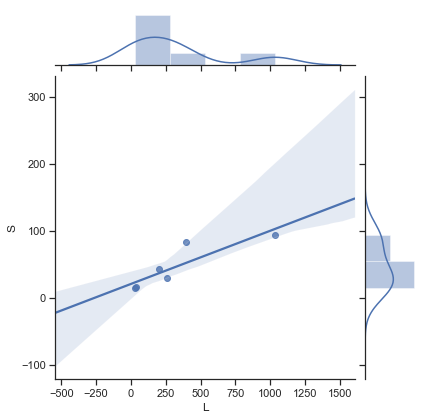

In [156]:
sns.jointplot("L", "S", data=DF, kind="reg")

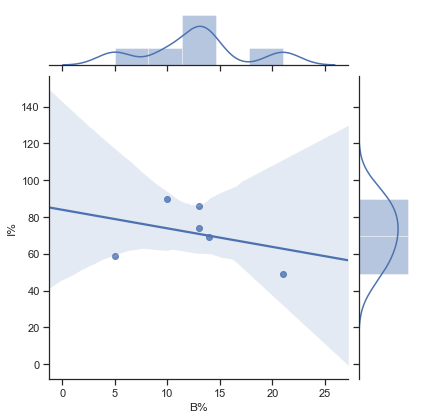

In [157]:
sns.jointplot("B%", "I%", data=DF, kind="reg")

# co-relation plots between the parameter :
- ### Co-relation plots are important to understand the relation between two parameters of the Dataset

C:\Users\shrey\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\shrey\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\shrey\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\bandwidths.py:20: RuntimeWarning: invalid value encountered in minimum
  return np.minimum(np.std(X, axis=0, ddof=1), IQR)
C:\Users\shrey\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


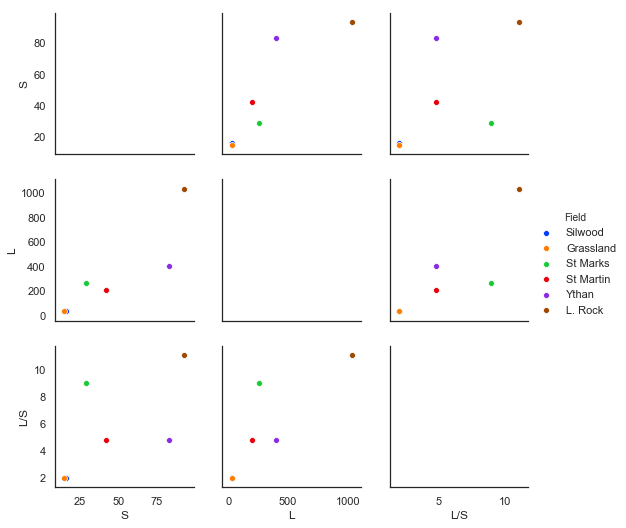

In [264]:
# Corelation plot between attributes
sns.pairplot(DF.iloc[:,:4], hue='Field',palette='bright')

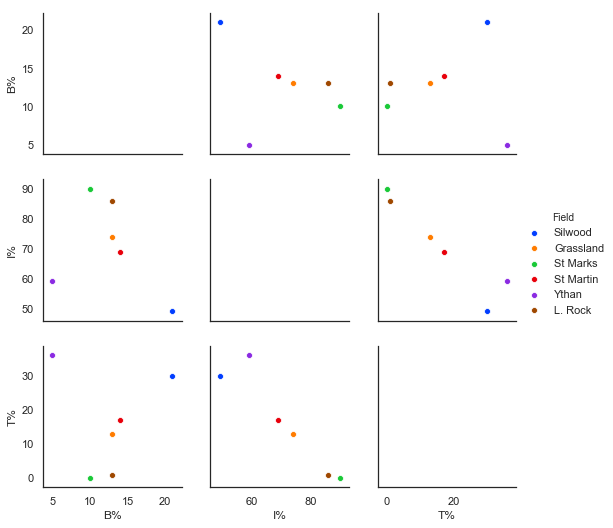

In [265]:
# Corelation plot between attributes
sns.pairplot(DF.iloc[:,[0,4,5,6]], hue='Field',palette='bright')

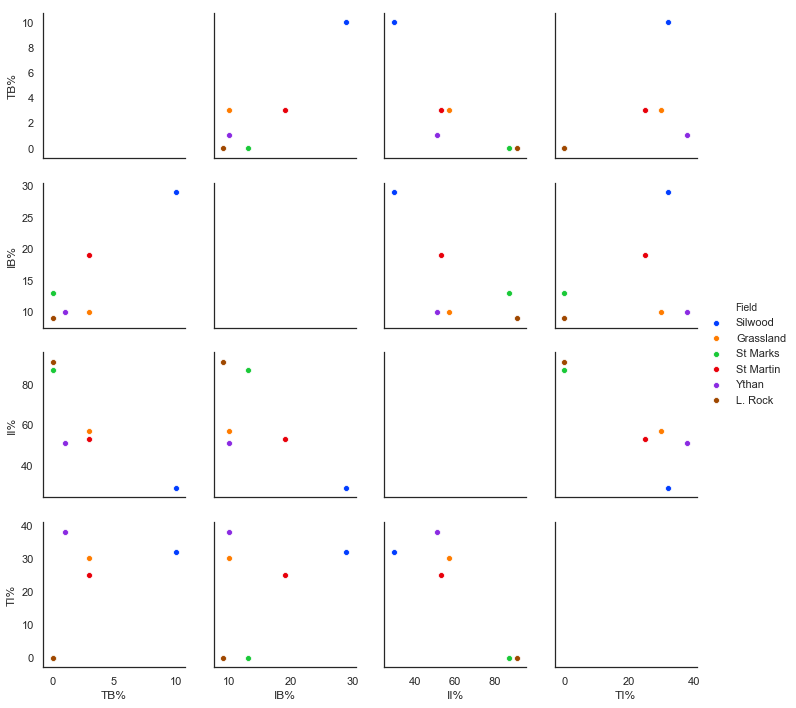

In [266]:

# Corelation plot between attributes
sns.pairplot(DF.iloc[:,[0,7,8,9,10]], hue='Field',palette='bright')

# Distribution plot for each Parameter: 
- ### Distribution will help us better understand spread of each parameter through out all the datasets

Text(0.5, 1.0, 'Spread of TI%')

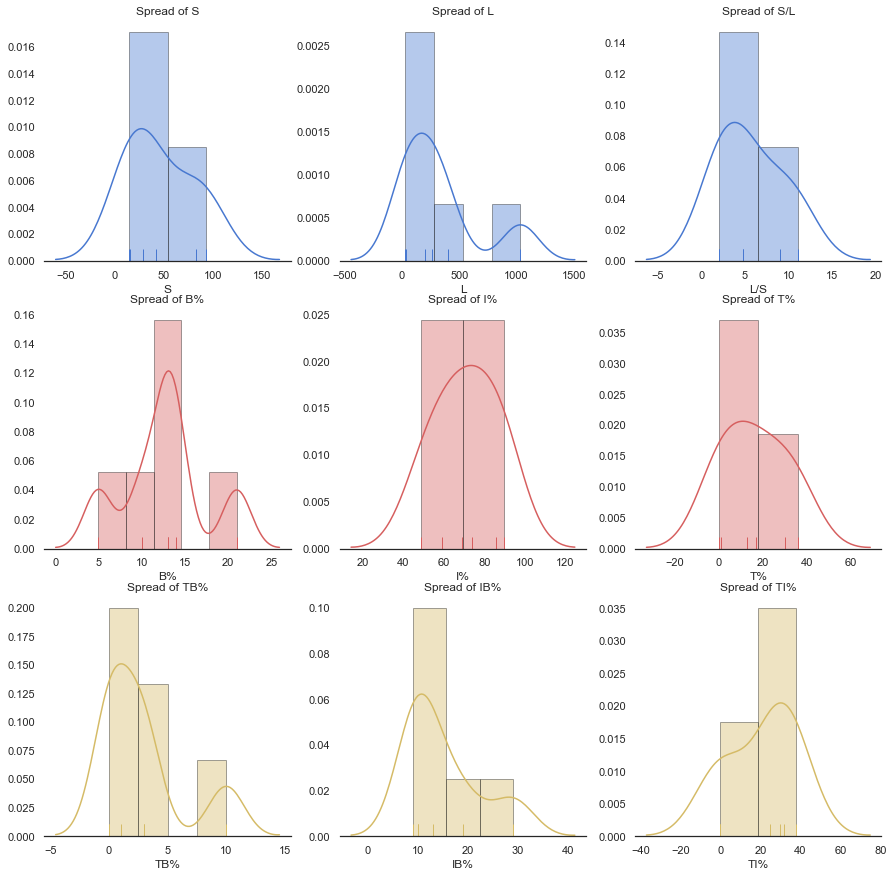

In [267]:
# Setting seaborn theme
sns.set(style="white", palette="muted", color_codes=True)

# Building a subplot grid of 3*3 giving us 9 subplots
f, axes = plt.subplots(3, 3, figsize=(15, 15), sharex=False)
sns.despine(left=True)

# Plotting each subgraph and placing them in their grid
sns.distplot(DF["S"], hist=True,rug=True,color="b", ax=axes[0, 0], hist_kws=dict(ec="k")).set_title("Spread of S")
sns.distplot(DF["L"], hist=True, rug=True, color="b", ax=axes[0, 1], hist_kws=dict(ec="k")).set_title("Spread of L")
sns.distplot(DF["L/S"], hist=True, rug=True, color="b", ax=axes[0, 2],hist_kws=dict(ec="k")).set_title("Spread of S/L")

sns.distplot(DF["B%"], hist=True, rug=True, color="r", ax=axes[1, 0],hist_kws=dict(ec="k")).set_title("Spread of B%")
sns.distplot(DF["I%"], hist=True, rug=True, color="r", ax=axes[1, 1],hist_kws=dict(ec="k")).set_title("Spread of I%")
sns.distplot(DF["T%"], hist=True, rug=True, color="r", ax=axes[1, 2],hist_kws=dict(ec="k")).set_title("Spread of T%")

sns.distplot(DF["TB%"], hist=True, rug=True, color="y", ax=axes[2, 0],hist_kws=dict(ec="k")).set_title("Spread of TB%")
sns.distplot(DF["IB%"], hist=True, rug=True, color="y", ax=axes[2, 1],hist_kws=dict(ec="k")).set_title("Spread of IB%")
sns.distplot(DF["TI%"], hist=True, rug=True, color="y", ax=axes[2, 2],hist_kws=dict(ec="k")).set_title("Spread of TI%")

# Data Engineering Week 1
## EXCERCISE 1:
<a id='ex1'></a>
[Jump to Table of content](#menu)

In [274]:
import numpy as np 
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn import datasets 
import seaborn as sns

# load dataset from sklearn 
from sklearn.datasets import load_iris

# Machine learning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier

sns.set(style="ticks", color_codes=True)

# Import Iris data from Sklearn library:

In [136]:
# read in the iris data
iris = load_iris()

# create X (features) and y (response)
X = iris.data
y = iris.target


# Turning the dataset into Dataframe
df = pd.DataFrame(X, columns=["sepal_length","sepal_width","petal_length","petal_width"])
df["target"] = y 


# Map the target integers with their names for easy understanding of the data
df.target[df.target==0] = "Iris-Setosa"
df.target[df.target==1] = "Iris-Versicolour"
df.target[df.target==2] = "Iris-Virginica"

C:\Users\shrey\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


### Data Understanding:

In [137]:
#Checking the dimension of the Iris dataset
print("shape of data in (rows, columns) is "+ str(df.shape) +"\n")
# Top 5 rows of the dataset
print(df.head(),"\n")
# Further description of the data
print(df.describe().transpose(),"\n")
# Data type information 
print("\n",df.info())

shape of data in (rows, columns) is (150, 5)

   sepal_length  sepal_width  petal_length  petal_width       target
0           5.1          3.5           1.4          0.2  Iris-Setosa
1           4.9          3.0           1.4          0.2  Iris-Setosa
2           4.7          3.2           1.3          0.2  Iris-Setosa
3           4.6          3.1           1.5          0.2  Iris-Setosa
4           5.0          3.6           1.4          0.2  Iris-Setosa 

              count      mean       std  min  25%   50%  75%  max
sepal_length  150.0  5.843333  0.828066  4.3  5.1  5.80  6.4  7.9
sepal_width   150.0  3.057333  0.435866  2.0  2.8  3.00  3.3  4.4
petal_length  150.0  3.758000  1.765298  1.0  1.6  4.35  5.1  6.9
petal_width   150.0  1.199333  0.762238  0.1  0.3  1.30  1.8  2.5 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null

# Data Exploration and Visualisation:

C:\Users\shrey\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


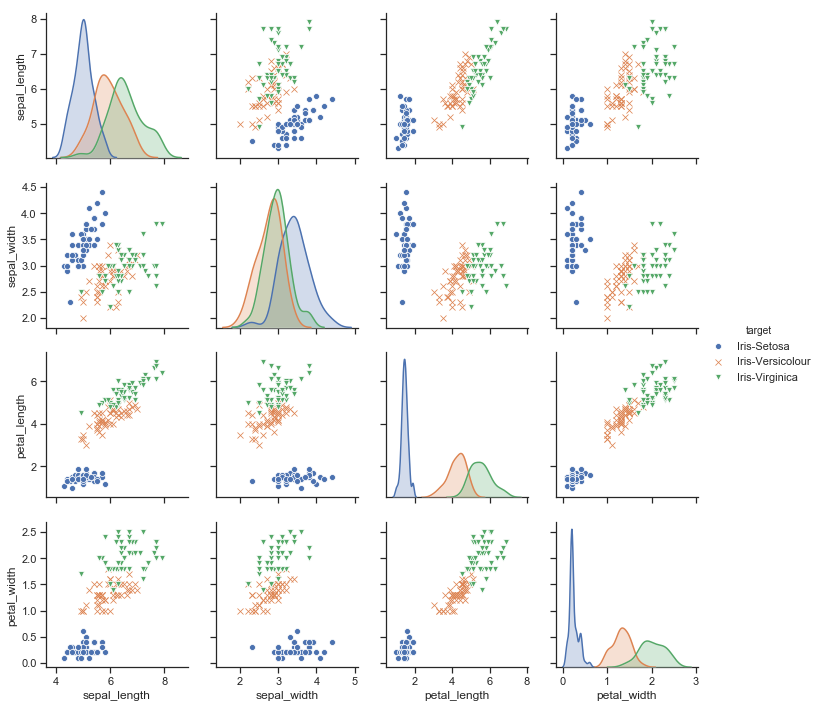

In [138]:

# Corelation plot between attributes
sns.pairplot(df, hue='target', markers=['o','x','v'])

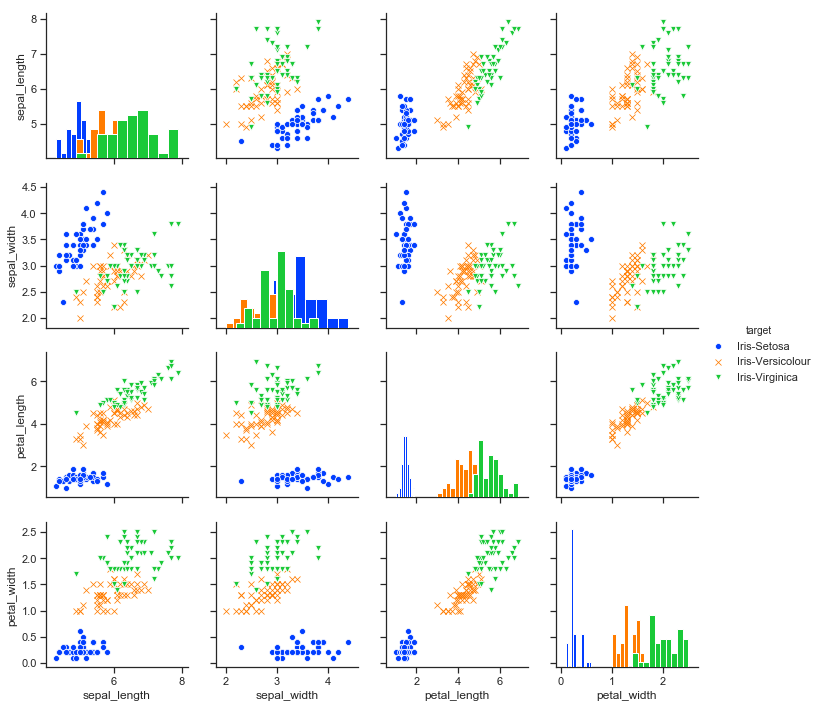

In [139]:

sns.pairplot(df,hue='target',diag_kind='hist',
             palette='bright',markers=['o','x','v'])

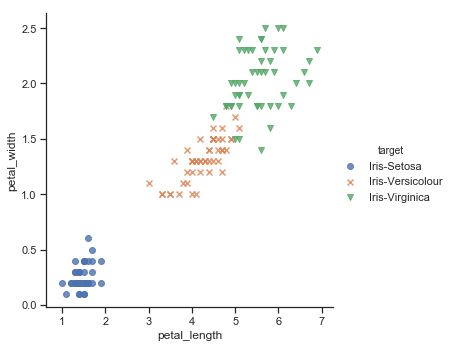

In [140]:
# Regression between petal length and petal width to see relation
sns.lmplot(x='petal_length', y='petal_width',
           hue="target", data=df, fit_reg=False,markers=['o','x','v'])

- ###  Petal Length and Petal Width appears to be linearly co-related
- ###  We can see a clear cluster of Iris-Setosa with low petal width and low petal length

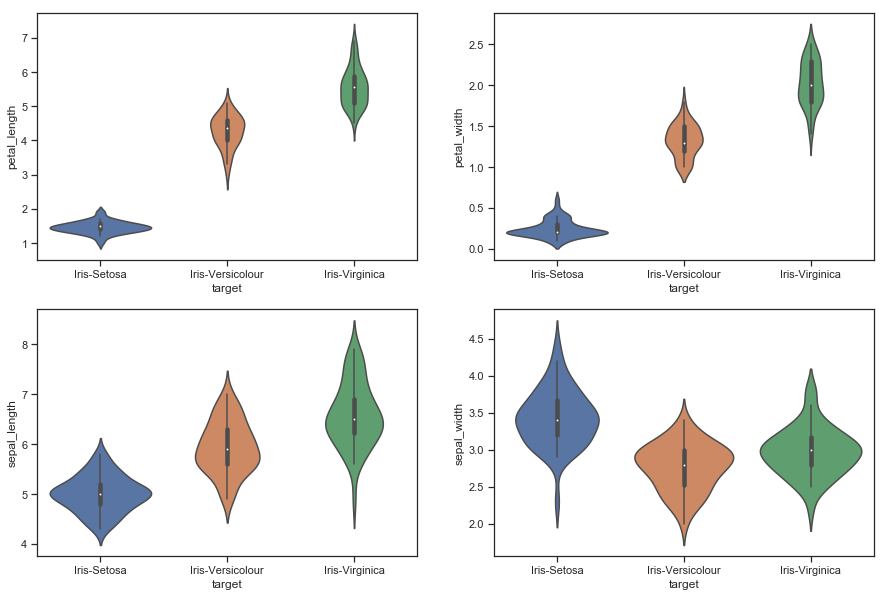

In [141]:
# Plotting Violin plot with target and all the attributes in subplots
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='target',y='petal_length',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='target',y='petal_width',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='target',y='sepal_length',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='target',y='sepal_width',data=df)

# Pre-processing of dataset:
### We will use PCA algorithm and LDA to reduce the dimensionality of the dataset.

### 1) Starting with PCA:


In [142]:
# To reduce the dimension of the dataset
# making an object of the algorithm
pca = PCA(n_components=2)

# Fitting the attributes in the PCA algorithm to reduce
out_pca = pca.fit_transform(df[['sepal_length',
                                'sepal_width',
                                'petal_length',
                                'petal_width']])

In [143]:
# Making a DataFrame with reduced attributes
df_pca = pd.DataFrame(data = out_pca, columns = ['pca1', 'pca2'])
print(df_pca.head())

       pca1      pca2
0 -2.684126  0.319397
1 -2.714142 -0.177001
2 -2.888991 -0.144949
3 -2.745343 -0.318299
4 -2.728717  0.326755


In [14]:
# Adding target variable in the PCA dataframe that we created
df_pca = pd.concat([df_pca,df['target']],axis=1)

In [19]:
print("Preview of PCA data Frame : \n")
print(df_pca.tail())

Preview of PCA data Frame : 

         pca1      pca2          target
145  1.944110  0.187532  Iris-Virginica
146  1.527167 -0.375317  Iris-Virginica
147  1.764346  0.078859  Iris-Virginica
148  1.900942  0.116628  Iris-Virginica
149  1.390189 -0.282661  Iris-Virginica


### 2) Next stop LDA

In [23]:
# Making an object of LDA Algorithm
lda = LinearDiscriminantAnalysis(n_components=2)

# Fitting out dataset to the lda algorithm 
# which gives out reduced attributes
out_lda = lda.fit_transform(X=df.iloc[:,:4], y=df['target'])

# Converting the lda reduced output to a dataframe 
df_lda = pd.DataFrame(data = out_lda, columns = ['lda1', 'lda2'])

# Adding the target variable to the lda dataframe 
df_lda = pd.concat([df_lda, df[['target']]], axis = 1)

In [24]:
print("Preview of LDA data Frame : \n")
print(df_lda.tail())

Preview of LDA data Frame : 

         lda1      lda2          target
145  5.645003  1.677717  Iris-Virginica
146  5.179565 -0.363475  Iris-Virginica
147  4.967741  0.821141  Iris-Virginica
148  5.886145  2.345091  Iris-Virginica
149  4.683154  0.332034  Iris-Virginica


Text(0.5, 1.0, 'Regression between LDA Reduced attributes')

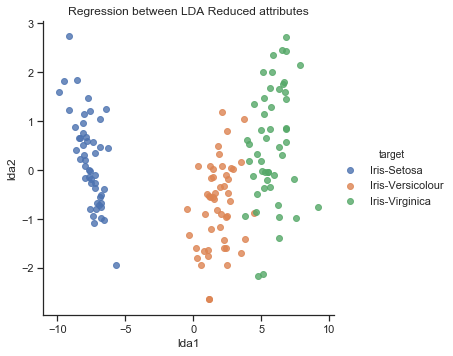

In [37]:
sns.lmplot(x="lda1", y="lda2", hue="target", data=df_lda, fit_reg=False)
ax = plt.gca()
ax.set_title("Regression between LDA Reduced attributes")

Text(0.5, 1.0, 'Regression between PCA Reduced attributes')

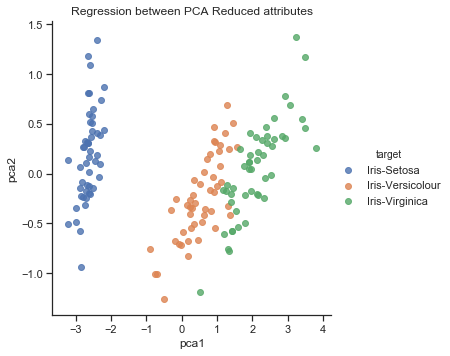

In [38]:
sns.lmplot(x="pca1", y="pca2", hue="target", data=df_pca, fit_reg=False)
ax = plt.gca()
ax.set_title("Regression between PCA Reduced attributes")

## Lets make a  violine plot for PCA and LDA:
#### This graph below shows a clear difference in spread of attributes in LDA and PCA

Text(0.5, 1.0, 'Violin plot: Feature = PCA_1')

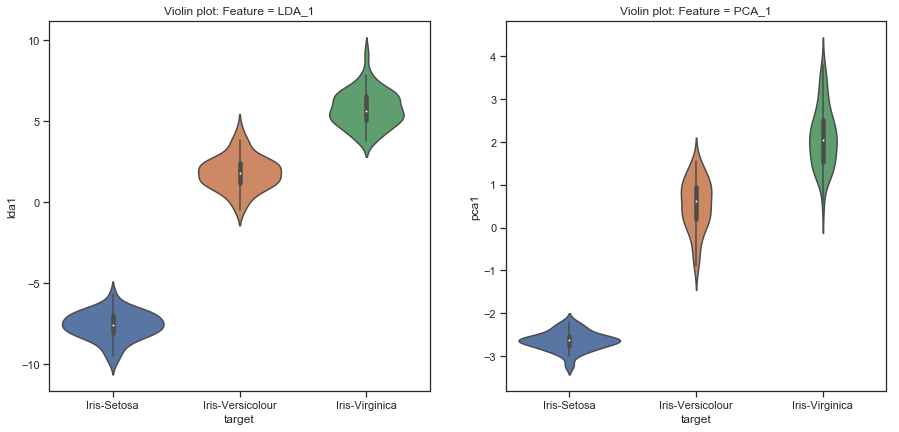

In [48]:
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
sns.violinplot(x='target',y='lda1', data=df_lda).set_title(
    "Violin plot: Feature = LDA_1")

plt.subplot(2,2,2)
sns.violinplot(x='target',y='pca1', data=df_pca).set_title(
    "Violin plot: Feature = PCA_1")


# Training an ML model:
- We are going to start with KMeans clustering 
- Using Silhouette score to access the performance of the algorithm 

*The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation).The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.*

In [50]:
# initialize k-means algo object
# Starting with 3 clusters as we have 3 classes in the target
kmns = KMeans(n_clusters=3, random_state=44)

In [60]:
# fit algo to PCA and find silhouette score
# First we will start with PCA dataframe
out_kms_pca = kmns.fit_predict(out_pca)


silhouette = silhouette_score(out_pca, out_kms_pca)
print("PCA silhouette score = " + str(silhouette))

PCA silhouette score = 0.597676421954799


In [53]:
# fit algo to LDA and find silhouette score
out_kms_lda = kmns.fit_predict(out_lda)
silhouette = silhouette_score(out_lda, out_kms_lda)
print("LDA silhouette score = %2f " % silhouette)

LDA silhouette score = 0.655816 


### From the above silhouette value we can see how LDA is doing better than PCA

# Making decisions with the prediction:
### Here We will first spplit the data into two parts i.e Training data and Testing data. 
- Further, we will use SVM and Random forrest algorithms since we are dealing with a classification problem. 
- We will use F1 score to access the prediction of both the Algorithms

*F1 measure, is a measure of a test's accuracy. The F score is defined as the weighted harmonic mean of the test's precision and recall.*


### Step 1: Splitting the dataset
- Purpose of splitting the dataset is to test the performance of the model on the portion of dataset that the model hasnt seen before. 
- This is important to avoid overfitting problem.

In [89]:
# Keeping the test sample to 30% of the dataset
df_train, df_test = train_test_split(df_lda, 
                                     test_size=0.3, random_state=42)

In [90]:
# Preview of the split
print('train set shape = ' + str(df_train.shape), "\n")
print('test set shape = ' + str(df_test.shape), "\n")
print(df_train.head())

train set shape = (105, 3) 

test set shape = (45, 3) 

         lda1      lda2            target
81   0.605525 -1.942980  Iris-Versicolour
133  3.815160 -0.942986    Iris-Virginica
137  4.995503  0.187769    Iris-Virginica
75   1.437558 -0.134425  Iris-Versicolour
109  6.852813  2.717590    Iris-Virginica


## Step 2: Training the model
*C is a penalty term and is called a hyperparameter; we can tune this parameter to steer a fit in a certain direction.*

In [91]:
# Creating a SVM Model
clf = SVC(kernel='rbf', C=0.8, gamma=10)

# Training the model with train dataset
clf.fit(df_train[['lda1', 'lda2']], df_train['target'])

SVC(C=0.8, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## Step 3: Prediction and performance measurement

In [92]:
# predict on test set
y_pred = clf.predict(df_test[['lda1', 'lda2']])
f1 = f1_score(df_test['target'], y_pred, average='weighted')

# check prediction score
print("f1 score for SVM classifier = %2f " % f1)

f1 score for SVM classifier = 0.809216 


In [93]:
# Lets try the F1 score for different values of Hyperparameter C
f_score = []
c = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
for a in c:
    # Creating model
    clf = SVC(kernel='rbf', C=a, gamma=10)
    # Training 
    clf.fit(df_train[['lda1', 'lda2']], df_train['target'])
    # Predicting with the model
    y_pred = clf.predict(df_test[['lda1', 'lda2']])
    #Calculating F1 score
    f1 = f1_score(df_test['target'], y_pred, average='weighted')
    f_score.append(f1)
    print("f1 score for SVM classifier when c is {} = {} ".format(a,f1))

f1 score for SVM classifier when c is 0.1 = 0.32690058479532164 
f1 score for SVM classifier when c is 0.2 = 0.32690058479532164 
f1 score for SVM classifier when c is 0.3 = 0.5934795574795575 
f1 score for SVM classifier when c is 0.4 = 0.7201439684198304 
f1 score for SVM classifier when c is 0.5 = 0.7201439684198304 
f1 score for SVM classifier when c is 0.6 = 0.7436540847067163 
f1 score for SVM classifier when c is 0.7 = 0.8092159692159693 
f1 score for SVM classifier when c is 0.8 = 0.8092159692159693 
f1 score for SVM classifier when c is 0.9 = 0.8092159692159693 
f1 score for SVM classifier when c is 1.0 = 0.8513661766858699 


C:\Users\shrey\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\shrey\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


C:\Users\shrey\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Line Plot between f1 score and C parameter')

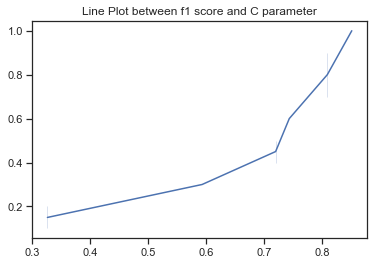

In [94]:
# Plotting the grpah to see the change in f1 score with parameter tuning
sns.lineplot(x=f_score, y=c).set_title(
    "Line Plot between f1 score and C parameter")


# Random Forest Algorithm:

In [97]:
# classify with RF
# Creating Random forest model
clf = RandomForestClassifier(n_estimators=2, random_state=42)

# Training the model with train dataset
clf.fit(df_train[['lda1', 'lda2']], df_train['target'])

# Predicting the target fot the Test dataset using trained model
y_pred = clf.predict(df_test[['lda1', 'lda2']])

# Calculating f1 Score 
f1 = f1_score(df_test['target'], y_pred, average='weighted')

# check prediction score
print("f1 score for RF classifier = %2f " % f1)


f1 score for RF classifier = 0.955291 


- We can try various things to improve the outcome of the model. 
- We can change the split or use hyper parameter tuning and many more folding and training techniques to improve the results of the model

### Random Forest is giving a much superior output with f1 score of 96% next to 85% fl score of SVM

# Excercise 2:
### *Connecting to Databases using python and Quering the data*
<a id='ex2'></a>
[Jump to Table of content](#menu)

## STEP 1: Connecting to the database
*Here we are using a local sqllite database*

In [98]:
# Importing the library
import sqlite3

In [99]:
# File path
path = "C:/Users/shrey/OneDrive/Desktop/Data Engineering/Data_Source"
sqlite_file = path+"/boston.db"

In [101]:
# Connecting to the database file using the file path
conn = sqlite3.connect(sqlite_file)

## STEP 2: Create a cursor for the database
-  Cursors facilitate subsequent processing in conjunction with the traversal, such as retrieval, addition and removal of database records.
-  A cursor can be viewed as a pointer to one row in a set of rows.

In [102]:
# initialize a cursor obect
cur = conn.cursor()

## STEP 3: Quere data as per the need using the cursor
- We will send quere as a string with execute function

In [113]:
# define a traversing search
cur.execute("select * from boston limit 100;")

In [114]:
# fetch and print
tim = cur.fetchall()
# Data is stored in list  
print(tim[1])

(1, 0.02731, 0.0, 7.07, 0.0, 0.469, 6.421, 78.9, 4.9671, 2.0, 242.0, 17.8, 396.9, 9.14, 21.6)


In [119]:
# Lets try some filters in the quere
cur.execute("select ZN from boston where ZN > 0.0;")
# Fetching the data
data = cur.fetchall()
# Printing the data
print(data)

[(18.0,), (12.5,), (12.5,), (12.5,), (12.5,), (12.5,), (12.5,), (12.5,), (75.0,), (75.0,), (21.0,), (21.0,), (21.0,), (21.0,), (75.0,), (90.0,), (85.0,), (100.0,), (25.0,), (25.0,), (25.0,), (25.0,), (25.0,), (25.0,), (17.5,), (80.0,), (80.0,), (12.5,), (12.5,), (12.5,), (25.0,), (25.0,), (25.0,), (25.0,), (28.0,), (28.0,), (28.0,), (45.0,), (45.0,), (45.0,), (45.0,), (45.0,), (45.0,), (60.0,), (60.0,), (80.0,), (80.0,), (80.0,), (80.0,), (95.0,), (95.0,), (82.5,), (82.5,), (95.0,), (95.0,), (30.0,), (30.0,), (30.0,), (30.0,), (30.0,), (30.0,), (22.0,), (22.0,), (22.0,), (22.0,), (22.0,), (22.0,), (22.0,), (22.0,), (22.0,), (22.0,), (80.0,), (80.0,), (90.0,), (20.0,), (20.0,), (20.0,), (20.0,), (20.0,), (20.0,), (20.0,), (20.0,), (20.0,), (20.0,), (20.0,), (20.0,), (20.0,), (20.0,), (20.0,), (20.0,), (20.0,), (40.0,), (40.0,), (40.0,), (40.0,), (40.0,), (20.0,), (20.0,), (20.0,), (20.0,), (90.0,), (90.0,), (55.0,), (80.0,), (52.5,), (52.5,), (52.5,), (80.0,), (80.0,), (80.0,), (70.0,),

### Now, let's first duplicate our original query for the entire table, which was limited to 100 rows.

In [124]:
# get all data inside boston table limited to 100 rows
# Now we will use Pandas sql methods to manipulate and extract the data
# The data will be transformed into a dataframe
df = pd.read_sql_query("select * from boston limit 100;", conn)

# Print the data shape
print("df.shape = " + str(df.shape))

# Preview of the dataframe
print("\n","Preview of the DataFrame:","\n",df.head())

df.shape = (100, 15)

 Preview of the DataFrame: 
    record     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0       0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1       1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2       2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3       3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4       4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


# Data Understnading:

In [133]:
# Lets extract the entire dataset from the database
df = pd.read_sql_query("select * from boston;", conn)

# Printing the shape of the dataframe
print("df has {} columns and {} rows" .format(df.shape[1],df.shape[0]),"\n")
print("----------------------------------------------------------------")
print("DataFrame Preview:\n")
print(df.head())
print("----------------------------------------------------------------")
print("\n Summarize with Pandas describe(): \n")
print(df.describe().transpose())


df has 15 columns and 506 rows 

----------------------------------------------------------------
DataFrame Preview:

   record     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0       0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1       1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2       2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3       3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4       4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  
----------------------------------------------------------------

 Summarize with Pandas describe(): 

         count        mean         std        min         25%        50%  \
record   506

[Jump to Table of content](#menu)